In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']#显示中文
mpl.rcParams['font.serif'] = ['KaiTi']
matplotlib.rcParams['axes.unicode_minus']=False#显示负号
from wordcloud import WordCloud
import jieba

In [53]:
df = pd.read_csv(r'C:\Users\Administrator\project\zhaopin.csv',header=None)

In [54]:
df.columns=['job_url','job_name','company_name','company_url','welfare_list','job_requested','Recruitment_info','money','jib_kills','company_profile','company_type','company_sum','job_type','education','Work_Experience','city','Release_Date','recruiting_sum']

In [55]:
df['money']=df['money'].apply(lambda x: np.NaN if str(x).isspace() else x)

In [56]:
df.dropna(axis = 0,subset=['money'],inplace=True)

In [57]:
df_2 = df['money']

In [58]:
w_m = []
q_m = []
n_m = []
y_m = []
for i in df_2.index:

    if '万/月' in str(df_2.loc[i]):
        df_2.loc[i]=df_2.loc[i].replace('万/月','')
        a= df_2.loc[i].split('-')
        b = int(float(a[0])*10000+float(a[1])*10000) 
        df_2.loc[i] = b/2
        
    if '千/月' in str(df_2.loc[i]):
        df_2.loc[i]=df_2.loc[i].replace('千/月','')
        a= df_2.loc[i].split('-')
        b = int(float(a[0])*1000+float(a[1])*1000)
        df_2.loc[i] = b/2



    if '万/年' in str(df_2.loc[i]):
        df_2.loc[i]=df_2.loc[i].replace('万/年','')
        a= df_2.loc[i].split('-')
        b = int(float(a[0])*1000+float(a[1])*100)
        df_2.loc[i] = b/2
        
    if '元/天' in str(df_2.loc[i]):
        df_2.loc[i]=df_2.loc[i].replace('元/天','')
        a= df_2.loc[i].split('-')

        df_2.loc[i] = int(float(a[0])*30)
    if '千以下/月' in str(df_2.loc[i]):
        df_2.loc[i]=df_2.loc[i].replace('千以下/月','')
        a= df_2.loc[i].split('-')
        df_2.loc[i] = int(float(a[0])*1000)

    if '元/小时' in str(df_2.loc[i]):
        df_2.loc[i]=df_2.loc[i].replace('元/小时','')
        a= df_2.loc[i].split('-')
        df_2.loc[i] = int(float(a[0])*300)

    if '万以下/年' in str(df_2.loc[i]):
        df_2.loc[i]=df_2.loc[i].replace('万以下/年','')
        a= df_2.loc[i].split('-')
        df_2.loc[i] = int(float(a[0])*1000)


In [59]:
df['money']=df_2

In [60]:
df

,job_url,job_name,company_name,company_url,welfare_list,job_requested,Recruitment_info,money,jib_kills,company_profile,company_type,company_sum,job_type,education,Work_Experience,city,Release_Date,recruiting_sum
0,https://jobs.51job.com/beijing-hdq/98896435.ht...,软件开发工程师(python/c++)-NDS(职位编号：Navinfo000560),北京四维图新科技股份有限公司,https://jobs.51job.com/all/co298732.html,"['五险一金', '餐饮补贴', '弹性工作', '定期体检', '年终奖金', '免费班车...","['负责新系统的设计、开发、完善工作参与公司内部及外部需求的沟通', '优秀的代码开发能力精...","['北京-海淀区', '无工作经验', '本科', '招1人', '12-07发布']",9000,\r\n职能类别：\r\n\r\r\n\t\t\t\t\t\t\t\t\t\t软件工程师\t...,北京四维图新科技股份有限公司（简称：四维图新，深交所股票代码：002405）是中国领先的数字...,上市公司,1000-5000人,互联网/电子商务\r\n计算机软件,本科,无工作经验,北京-海淀区,12-07发布,招1人
1,https://jobs.51job.com/beijing-hdq/109038595.h...,Python高级开发工程师,北京中创信测科技股份有限公司,https://jobs.51job.com/all/co3496121.html,"['五险一金', '补充医疗保险', '餐饮补贴', '年终奖金', '定期体检']","['岗位职责：', '1、根据产品需求，完成产品功能的设计、编码、测试和发布；', '2、根...","['北京-海淀区', '3-4年经验', '本科', '招2人', '12-07发布']",18500,\r\n职能类别：\r\n\r\r\n\t\t\t\t\t\t\t\t\t\t软件工程师\t...,北京中创信测科技股份有限公司是国内领先的致力于通信测试领域的高新技术企业，自成立以来一直从主...,民营公司,150-500人,通信/电信运营、增值服务,本科,3-4年经验,北京-海淀区,12-07发布,招2人
2,https://jobs.51job.com/beijing/109029812.html?...,Python开发工程师,北京先进数通信息技术股份公司,https://jobs.51job.com/all/co105547.html,"['五险一金', '餐饮补贴', '定期体检', '年终奖金']","['1. 3-5年以上工作经验,具有金融或互联网工作经验者优先，有系统分析、设计经验者...","['北京', '3-4年经验', '本科', '招5人', '12-07发布', '计算机科...",14000,\r\n职能类别：\r\n\r\r\n\t\t\t\t\t\t\t\t\t\t软件工程师\t...,北京先进数通信息技术股份公司成立于2000年10月，是一家致力于金融信息化建设的软件和集成服...,上市公司,1000-5000人,计算机软件\r\n计算机硬件,本科,3-4年经验,北京,0,招5人
3,https://jobs.51job.com/beijing-cyq/107996008.h...,Python后端开发工程师,乐荐信息科技（北京）有限公司,https://jobs.51job.com/all/co4530849.html,"['做五休二', '周末双休', '弹性工作', '带薪年假', '五险一金', '节日福利...","['', '工作职责:', '(1) 与团队协同工作， 致力于Web应用及服务器端HTTP接...","['北京-朝阳区', '2年经验', '本科', '招1人', '12-07发布']",13500,\r\n职能类别：\r\n\r\r\n\t\t\t\t\t\t\t\t\t\t互联网软件开发...,乐荐信息科技（北京）有限公司，是一群来自于互联网、保险、医疗、电商等领域的资深创业者携手打造...,民营公司,50-150人,互联网/电子商务\r\n保险,本科,2年经验,北京-朝阳区,12-07发布,招1人
4,https://jobs.51job.com/beijing-cyq/109033667.h...,数据平台开发工程师（Python方向）,DaDa,https://jobs.51job.com/all/co5014962.html,"['试用期全薪', '六险一金', '年终奖金', '行业领先', '补充医疗保险', '1...","['岗位职责：', '1.负责数据仓库元数据、主数据管理系统的设计、开发和维护；', '2....","['北京-朝阳区', '5-7年经验', '本科', '招2人', '12-07发布']",22500,\r\n职能类别：\r\n\r\r\n\t\t\t\t\t\t\t\t\t\t高级软件工程师...,哒哒英语是一款专注于K12领域的专业在线青少儿英语教育应用。自2013年成立以来，通过不断地...,民营公司,5000-10000人,教育/培训/院校\r\n互联网/电子商务,本科,5-7年经验,北京-朝阳区,12-07发布,招2人
5,https://jobs.51job.com/beijing-syq/109010444.h...,Python开发工程师,联合永道（上海）信息技术有限公司,https://jobs.51job.com/all/co2496950.html,"['五险一金', '免费班车', '员工旅游', '交通补贴', '餐饮补贴', '工作环境...","['1. 精通Python', '2. 熟悉SQL语言，能熟练使用mysql，了解常用的SQ...","['北京-顺义区', '无工作经验', '无学历要求', '招3人', '12-07发布']",12500,\r\n职能类别：\r\n\r\r\n\t\t\t\t\t\t\t\t\t\t互联网软件开发...,联合永道是一家专注于教育领域软件产品研发与销售的高新技术企业，主要从事教育软件产品的开发及应...,民营公司,500-1000人,计算机软件,无学历要求,无工作经验,北京-顺义区,12-07发布,招3人
6,https://jobs.51job.com/beijing/107068355.html?...,高级Python后端工程师,达观数据,https://jobs.51job.com/all/co4133721.html,"['五险一金', '补充医疗保险', '员工旅游', '专业培训', '年终奖金', '绩效...","['职位描述：', '1、负责业务需求分析，将业务需求拆分成独立的业务功能；', '2、带领...","['北京', '5-7年经验', '本科', '招2人', '12-07发布']",27000,\r\n职能类别：\r\n\r\r\n\t\t\t\t\t\t\t\t\t\t高级软件工程师...,达观数据是全球领先的文本智能处理专家，是一家专注于企业知识管理和文字语义理解的国家高新技术企...,民营公司,50-150人,计算机软件\r\n互联网/电子商务,本科,5-7年经验,北京,12-07发布,招2人
7,https://jobs.51job.com/beijing-cyq/104283209.h...,Python实习-机器学习方向,寰宇优才教育科技（北京）有限公司,https://jobs.51job.com/all/co5053681.html,"['五险一金', '补充医疗保险', '补充公积金', '员工旅游', '交通补贴', '出...","['（能力不足，但有Python开发意向者，可放宽要求提供实习岗位）', '', '1.本科...","['北京-朝阳区', '无工作经验', '无学历要求', '招6人', '12-07发布']",9000,\r\n职能类别：\r\n\r\r\n\t\t\t\t\t\t\t\t\t\t软件工程师\t...,寰宇优才教育科技（北京）有限公司,民营公司,150-500人,计算机软件,无学历要求,无工作经验,北京-朝阳区,12-07发布,招6人
8,https://jobs.51job.com/beijing-cpq/108973792.h...,Python开发工程师,北京万维盈创科技发展有限公司,https://jobs.51job.com/all/co692605.html,"['年终奖金', '员工旅游', '定期体检', '专业培训', '交通补贴', '通讯补贴...","['岗位职责：', '1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划；', '2....","['北京-昌平区', '无工作经验', '本科', '招1人', '12-07发布']",11500,\r\n职能类别：\r\n\r\r\n\t\t\t\t\t\t\t\t\t\t软件工程师\t...,北京万维盈创科技发展有限公司（简称

In [62]:
df['money']=df['money'].apply(lambda x: np.NaN if str(x).isspace() else x)

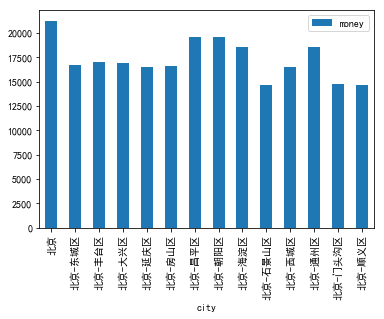

In [63]:
df.pivot_table(index='city',values='money').plot(kind='bar')

In [68]:
df['money'].tolist()

[9000.0,
 18500.0,
 14000.0,
 13500.0,
 22500.0,
 12500.0,
 27000.0,
 9000.0,
 11500.0,
 12500.0,
 40000.0,
 8500.0,
 14000.0,
 15000.0,
 17500.0,
 20000.0,
 32500.0,
 15000.0,
 12500.0,
 17500.0,
 15000.0,
 12000.0,
 11500.0,
 15000.0,
 17500.0,
 9000.0,
 15000.0,
 5750.0,
 12500.0,
 12000.0,
 17500.0,
 17500.0,
 12500.0,
 11500.0,
 14000.0,
 12500.0,
 20000.0,
 17500.0,
 17750.0,
 10500.0,
 11500.0,
 22500.0,
 27500.0,
 13500.0,
 12500.0,
 12500.0,
 17500.0,
 17500.0,
 12500.0,
 6000.0,
 17500.0,
 27500.0,
 12500.0,
 15000.0,
 22500.0,
 30000.0,
 17500.0,
 15000.0,
 8500.0,
 17500.0,
 32500.0,
 32500.0,
 22500.0,
 22500.0,
 27500.0,
 27500.0,
 13000.0,
 30000.0,
 17500.0,
 17500.0,
 15000.0,
 22500.0,
 12500.0,
 22500.0,
 14000.0,
 4100.0,
 17500.0,
 17000.0,
 12500.0,
 20000.0,
 22500.0,
 12500.0,
 20000.0,
 22500.0,
 21500.0,
 16500.0,
 10500.0,
 7000.0,
 22500.0,
 17500.0,
 9000.0,
 27000.0,
 15000.0,
 16000.0,
 8000.0,
 12500.0,
 17500.0,
 11500.0,
 10000.0,
 9000.0,
 20000.0,
 2

In [69]:
df = pd.DataFrame({"A": ["a", 1, 2, 3]})

In [70]:
df

,A
0,a
1,1
2,2
3,3


In [71]:
df = df.iloc[1:]

In [72]:
df.dtypes

A    object
dtype: object

In [73]:
df.infer_objects().dtypes

A    int64
dtype: object

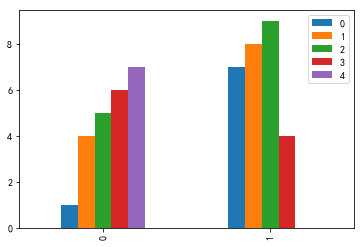

In [76]:
fd = pd.DataFrame([[1,4,5,6,7],[7,8,9,4]]).plot(kind='bar')

In [75]:
fd

,0,1,2,3,4
0,1,4,5,6,7.0
1,7,8,9,4,NaN
